In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import geopandas
from geopandas import GeoDataFrame
from shapely.geometry import Point, LineString , Polygon

In [3]:
df_input = pd.read_csv('epac-atl.csv')

In [4]:
df_input

,Unnamed: 0,id,name,time,year,lat,long,m_w_speed,mcp,rmw,...,NE_50,SE_50,SW_50,NW_50,NE_64,SE_64,SW_64,NW_64,max_50,max_64
0,0,AL0188,ALBERTO,80518,1988,32.0,77.5,20,1015,-99,...,0,0,0,0,0,0,0,0,0.0,0.0
1,1,AL0188,ALBERTO,80600,1988,32.8,76.2,20,1014,-99,...,0,0,0,0,0,0,0,0,0.0,0.0
2,2,AL0188,ALBERTO,80606,1988,34.0,75.2,20,1013,-99,...,0,0,0,0,0,0,0,0,0.0,0.0
3,3,AL0188,ALBERTO,80612,1988,35.2,74.6,25,1012,-99,...,0,0,0,0,0,0,0,0,0.0,0.0
4,4,AL0188,ALBERTO,80618,1988,37.0,73.5,25,1011,-99,...,0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21748,8318,EP2518,XAVIER,110800,2018,17.7,112.9,25,1008,-99,...,0,0,0,0,0,0,0,0,0.0,0.0
21749,8319,EP2518,XAVIER,110806,2018,17.6,113.6,20,1009,-99,...,0,0,0,0,0,0,0,0,0.0,0.0
21750,8320,EP2518,XAVIER,110812,2018,17.5,114.4,20,1009,-99,...,0,0,0,0,0,0,0,0,0.0,0.0
21751,8321,EP2518,XAVIER,110818,2018,17.4,115.1,20,1009,-99,...,0,0,0,0,0,0,0,0,0.0,0.0


In [6]:
cyclones = df_input[['id','name','year','lat','long']]
cyclones.head(10)

,id,name,year,lat,long
0,AL0188,ALBERTO,1988,32.0,77.5
1,AL0188,ALBERTO,1988,32.8,76.2
2,AL0188,ALBERTO,1988,34.0,75.2
3,AL0188,ALBERTO,1988,35.2,74.6
4,AL0188,ALBERTO,1988,37.0,73.5
5,AL0188,ALBERTO,1988,38.7,72.4
6,AL0188,ALBERTO,1988,40.0,70.8
7,AL0188,ALBERTO,1988,41.5,69.0
8,AL0188,ALBERTO,1988,43.0,67.5
9,AL0188,ALBERTO,1988,45.0,65.5


In [7]:
cyclones_filter = cyclones[(cyclones.name == 'IVAN')]

In [8]:
df = pd.DataFrame(cyclones_filter)
df.dtypes

id       object
name     object
year      int64
lat     float64
long    float64
dtype: object

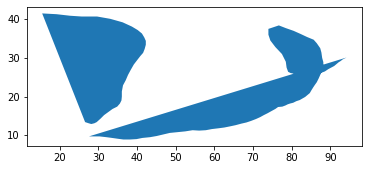

In [9]:
# Zip the coordinates into a point object and convert to a GeoDataFrame
geometry = [Point(xy) for xy in zip(df.long, df.lat)]
df = GeoDataFrame(df, geometry=geometry)

# Aggregate these points with the GroupBy
#df = df.groupby(['id','name','year']['geometry'].apply(lambda x: LineString(x.tolist()))
#df = GeoDataFrame(df, geometry='geometry')
df = df.groupby(['id','name','year'])['geometry'].apply(lambda x: Polygon(x.tolist()))

# Declare the result as a new a GeoDataFrame
df = geopandas.GeoDataFrame(df, geometry = 'geometry')

df.plot()

In [10]:
df.to_file(filename='IVAN polygon.geojson', driver='GeoJSON')
df.to_file(filename='IVAN polygon.shp', driver="ESRI Shapefile")